In [1]:
import scipy.stats as stats
import statsmodels.api as sms
import statsmodels.formula.api as smsformula
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


##### sex  1:male 2:female  education 2:university 1: graduate 3: highschool , marriage 1:married , 2:single

C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


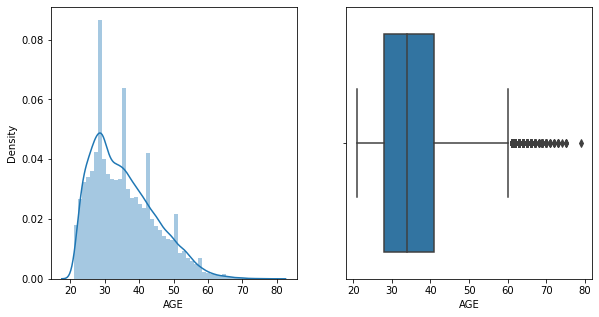

In [4]:
plt.figure(figsize= (15,5))

plt.subplot(1,3,1)
sns.distplot(df['AGE'])

plt.subplot(1,3,2)
sns.boxplot(x='AGE' ,data=df)

In [5]:
df['AGE'].describe(percentiles = [0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
10%         25.000000
20%         27.000000
25%         28.000000
30%         29.000000
40%         31.000000
50%         34.000000
60%         37.000000
70%         40.000000
80%         43.000000
90%         49.000000
99%         60.000000
max         79.000000
Name: AGE, dtype: float64

In [6]:
df['AGE'].skew(), df['AGE'].kurt()  # skewess indicate it is right skewed

(0.7322458687830562, 0.04430337823580954)

0.2892635438926005


C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


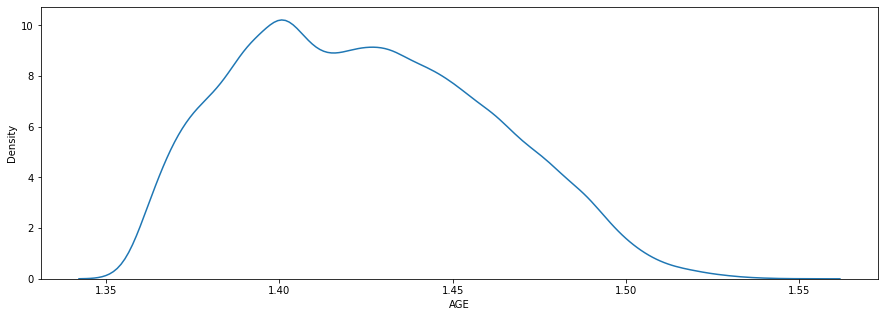

In [7]:
# using root of 10 transformation we try to reduce the skewness in age
print((df['AGE']**0.1).skew())
plt.figure(figsize=(15,5))
sns.distplot((df['AGE']**0.1), hist=False)

##### skewness reduce from 73 to 28

## Bivariate analysis of age with gender and default

C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

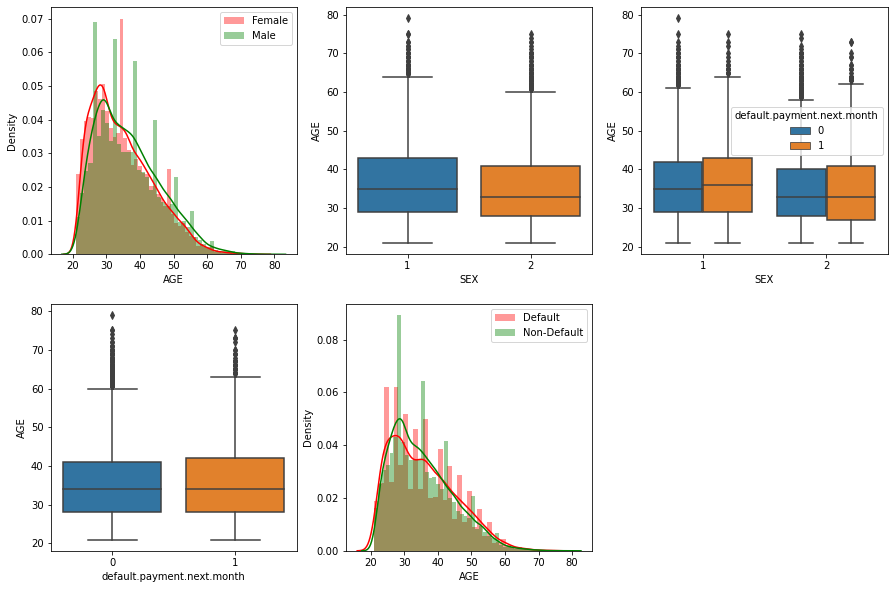

In [8]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.distplot(df[df['SEX']==2]['AGE'], color='r', label="Female")
sns.distplot(df[df['SEX']==1]['AGE'], color='g', label="Male")
plt.legend()

plt.subplot(2,3,2)
sns.boxplot(x='SEX', y='AGE', data=df)

plt.subplot(2,3,3)
sns.boxplot(x='SEX', y='AGE', data=df ,hue='default.payment.next.month')

plt.subplot(2,3,4)
sns.boxplot(x='default.payment.next.month', y='AGE', data=df)

plt.subplot(2,3,5)
sns.distplot(df[df['default.payment.next.month'] ==1]['AGE'], color='r', label='Default')
sns.distplot(df[df['default.payment.next.month'] ==0]['AGE'], color='g', label='Non-Default')
plt.legend()

In [9]:
df.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Default']

In [10]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## T-test

In [11]:
group1= df[df['Default'] ==1]['AGE']

group2= df[df['Default'] ==0]['AGE']



In [12]:
from scipy.stats import ttest_ind


In [13]:
t_statistics, p_value = ttest_ind(group1,group2)
print(t_statistics, p_value)

2.40594177499625 0.01613684589016383


#### here p value is less than 0.05 so null hypothesis is rejected there is an influence of age on default

## Bivariate of age and balance limit along with default

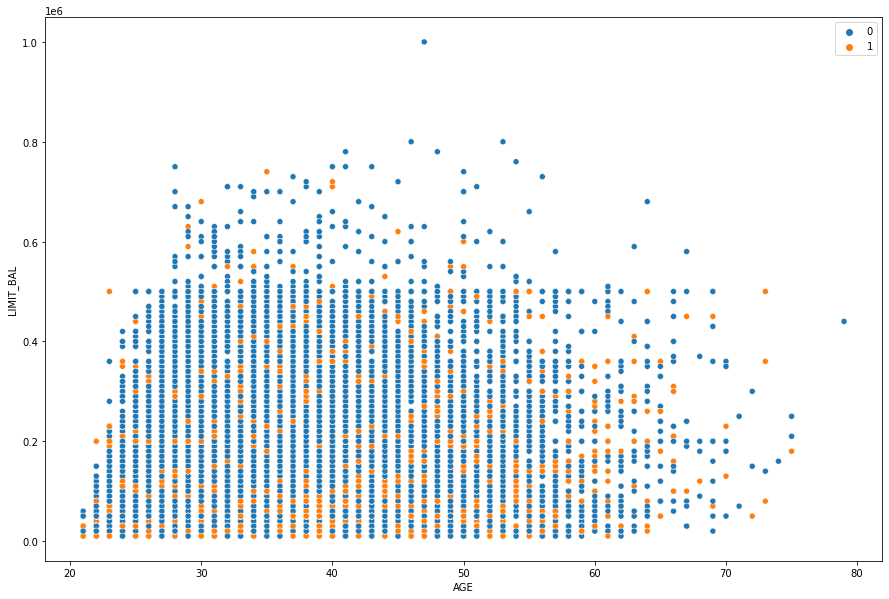

In [14]:
plt.figure(figsize=(15,10))

sns.scatterplot(x='AGE', y ='LIMIT_BAL', data=df, hue='Default')
plt.legend()

In [15]:
df['AGE'].corr(df['LIMIT_BAL'])  # here it show weak coorelation indicate age does not define ones bank balance

0.14471279755733582

## bivariate of age and education with default

In [16]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

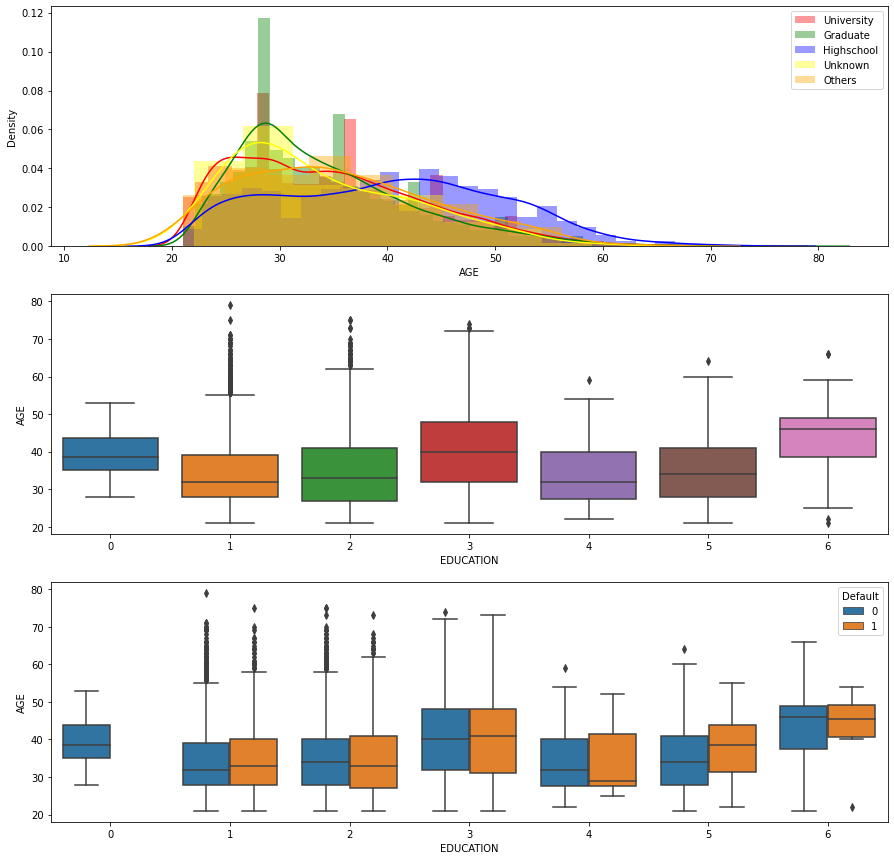

In [17]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.distplot(df[df['EDUCATION']==2]['AGE'], color='red', label='University')
sns.distplot(df[df['EDUCATION']==1]['AGE'], color='green', label='Graduate')
sns.distplot(df[df['EDUCATION']==3]['AGE'], color='blue', label='Highschool')
sns.distplot(df[df['EDUCATION']==4]['AGE'], color='yellow', label='Unknown')
sns.distplot(df[df['EDUCATION']==5]['AGE'], color='orange', label='Others')


plt.legend()

plt.subplot(3,1,2)
sns.boxplot(x='EDUCATION', y='AGE', data=df)

plt.subplot(3,1,3)
sns.boxplot(x='EDUCATION', y='AGE', data=df ,hue='Default')



## Bivariate of AGE and Marriage and also with default 

C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

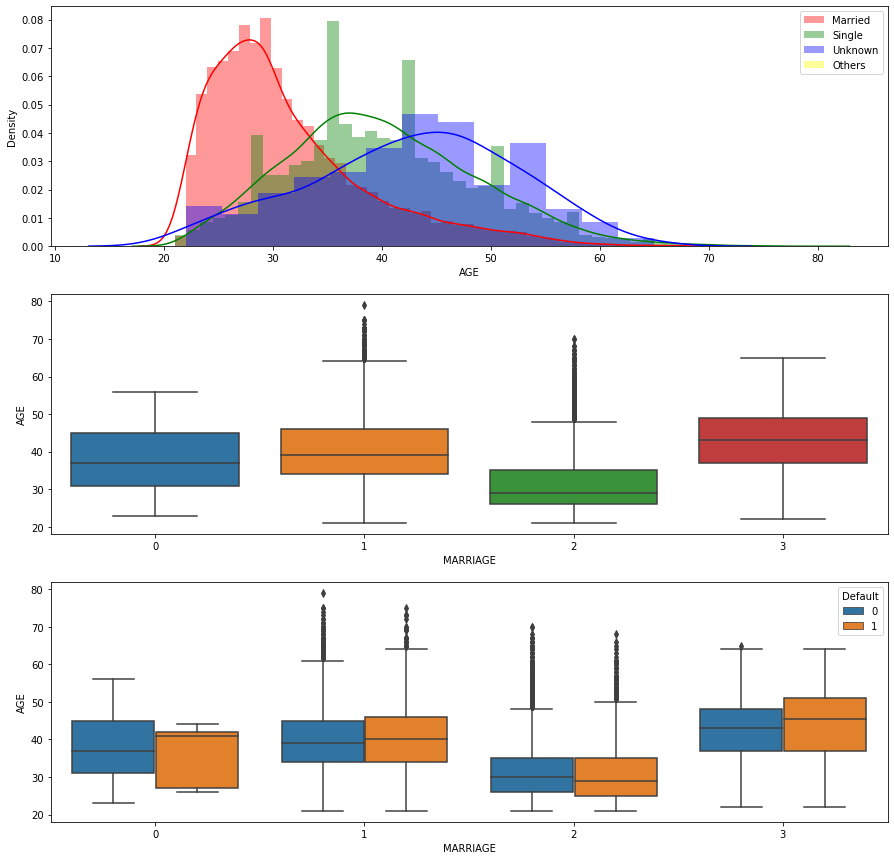

In [18]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.distplot(df[df['MARRIAGE']==2]['AGE'], color='red', label='Married')
sns.distplot(df[df['MARRIAGE']==1]['AGE'], color='green', label='Single')
sns.distplot(df[df['MARRIAGE']==3]['AGE'], color='blue', label='Unknown')
sns.distplot(df[df['MARRIAGE']==4]['AGE'], color='yellow', label='Others')



plt.legend()

plt.subplot(3,1,2)
sns.boxplot(x='MARRIAGE', y='AGE', data=df)

plt.subplot(3,1,3)
sns.boxplot(x='MARRIAGE', y='AGE', data=df ,hue='Default')


In [19]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

## Calculating WOE and IV

In [20]:
df['AGE_CAT'] = pd.cut(df['AGE'], bins= [0,25,34,44,100], labels=['0-25','26-34','35-44','44+'])

In [21]:
pd.crosstab(df.AGE_CAT, df.Default)

Default,0,1
AGE_CAT,,
0-25,2839,1032
26-34,9486,2339
35-44,7047,1971
44+,3992,1294


## Model Building

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV # randomized search on hyper parameter
from sklearn.preprocessing import StandardScaler

In [23]:
df = df.drop('AGE_CAT', axis=1)

In [24]:
df = df.drop('ID', axis=1)

In [25]:
df['SEX'] = pd.Categorical(df['SEX'])
df['SEX'] = df.SEX.cat.codes
df['MARRIAGE'] = pd.Categorical(df['MARRIAGE'])
df['MARRIAGE'] = df.MARRIAGE.cat.codes
df['EDUCATION'] = pd.Categorical(df['EDUCATION'])
df['EDUCATION'] = df.EDUCATION.cat.codes


In [26]:
x = df.drop('Default', axis = 1)
y = df['Default']

In [27]:
xtrain, xtest, ytrain , ytest = train_test_split(x,y ,test_size=0.2, stratify=y, random_state=42)

In [28]:
y = df['Default']
features = df.drop('Default', axis=1, inplace=False)

In [29]:
features['SEX'] = pd.Categorical(features['SEX'])
features['SEX'] = features.SEX.cat.codes
features['MARRIAGE'] = pd.Categorical(features['MARRIAGE'])
features['MARRIAGE'] = features.MARRIAGE.cat.codes
features['EDUCATION'] = pd.Categorical(features['EDUCATION'])
features['EDUCATION'] = features.EDUCATION.cat.codes
features.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,1,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,1,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,1,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,1,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,0,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [30]:
# standaried all feature
stdX = (features-features.mean())/ (features.std())

In [31]:
stdX.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136701,0.810147,0.185825,-1.057277,-1.245999,1.794534,1.782318,-0.696652,-0.666588,-1.530021,...,-0.667982,-0.672486,-0.663047,-0.652713,-0.341936,-0.227082,-0.296796,-0.308057,-0.314131,-0.293377
1,-0.365974,0.810147,0.185825,0.858543,-1.029030,-0.874977,1.782318,0.138862,0.188743,0.234913,...,-0.639244,-0.621626,-0.606219,-0.597956,-0.341936,-0.213584,-0.240001,-0.244226,-0.314131,-0.180875
2,-0.597192,0.810147,0.185825,0.858543,-0.161154,0.014860,0.111734,0.138862,0.188743,0.234913,...,-0.482400,-0.449723,-0.417181,-0.391623,-0.250287,-0.191884,-0.240001,-0.244226,-0.248679,-0.012122
3,-0.905483,0.810147,0.185825,-1.057277,0.164300,0.014860,0.111734,0.138862,0.188743,0.234913,...,0.032846,-0.232369,-0.186726,-0.156576,-0.221187,-0.169358,-0.228641,-0.237842,-0.244162,-0.237126
4,-0.905483,-1.234302,0.185825,-1.057277,2.333990,-0.874977,0.111734,-0.696652,0.188743,0.234913,...,-0.161186,-0.346991,-0.348131,-0.331476,-0.221187,1.335012,0.271161,0.266429,-0.269034,-0.255183


### Dataset with standarizes features

In [32]:
xstdtrain, xstdtest, ystdtrain, ystdtest =train_test_split(stdX, y, test_size=0.2, stratify=y, random_state=42)

## Feature selection

In [33]:
n_features_to_select=3
model = LogisticRegression()
rfe_stand = RFE(model, n_features_to_select=3)
fit_stand = rfe_stand.fit(stdX,y)
print("std model feature ranking:", fit_stand.ranking_)
score_std = rfe_stand.score(stdX, y)
print("Standardized score with feature selected is : %f (%f)"% (score_std.mean(), score_std.std()))

std model feature ranking: [ 7 15  9  8 10  1  6  4 18 11 21  1  5  2 20 13 19  3  1 14 12 16 17]
Standardized score with feature selected is : 0.812600 (0.000000)


In [34]:
features_name = np.array(features.columns)
print("most important feature : %s"% features_name[rfe_stand.support_])

most important feature : ['PAY_0' 'BILL_AMT1' 'PAY_AMT2']


In [35]:
ximp = stdX[['PAY_0', 'BILL_AMT1', 'PAY_AMT2']]
ximptrain, ximptest, yimptrain, yimptest = train_test_split(ximp, y , test_size=0.2, random_state=42)

In [36]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

## Hyper parameter tuning

In [37]:
# set up hyperparameter grid
param_grid = {'C' : np.logspace(-5,8,15)}

# intiatte a logistic regression classifier
logreg = LogisticRegression(max_iter=1000)

# intiate randomized search cv object
logreg_cv = RandomizedSearchCV(logreg,param_grid, cv=5, random_state=0)

# fitiing the data
logreg_cv.fit(xtrain, ytrain)

print("Tuned logistic regression parameter best C(regularization) value: {}".format(logreg_cv.best_params_))

Tuned logistic regression parameter best C(regularization) value: {'C': 8.483428982440725e-05}


Accuracy: 0.7788333333333334
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      6000
           1       0.00      0.00      0.00         0

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

average 5-fold cv score: 1 , Standard deviation: 0.0001


C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 24.0, 'Predict table')

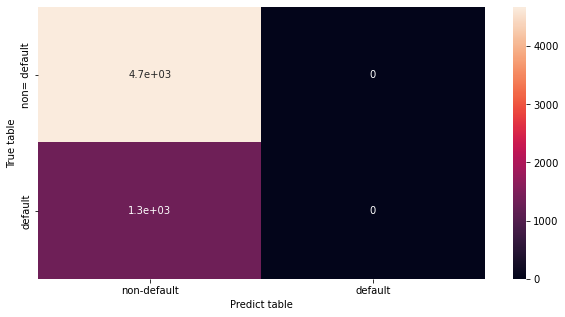

In [38]:
lr = LogisticRegression(C=0.051, random_state=0, max_iter=1000)
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
print("Accuracy:", accuracy_score(ypred, ytest))
cv_score = cross_val_score(lr, x,y, cv=5)

print(classification_report(ypred,ytest))
print("average 5-fold cv score: {}".format(round(np.mean(cv_score)),4),
      ", Standard deviation: {}".format(round(np.std(cv_score),4)))

plt.figure(figsize=(10,5))
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True, xticklabels=['non-default', 'default'], yticklabels=['non= default', 'default'])
plt.ylabel('True table')
plt.xlabel('Predict table')

#### bad model

In [39]:
# set up hyperparameter grid
param_grid = {'C' : np.logspace(-5,8,15)}

# intiatte a logistic regression classifier
logreg = LogisticRegression(max_iter=800)

# intiate randomized search cv object
logreg_cv = RandomizedSearchCV(logreg,param_grid, cv=5, random_state=0)

# fitiing the data
logreg_cv.fit(xstdtrain, ystdtrain)

print("Tuned logistic regression parameter best C(regularization) value: {}".format(logreg_cv.best_params_))

Tuned logistic regression parameter best C(regularization) value: {'C': 2275.845926074791}


Accuracy: 0.8078333333333333
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      5538
           1       0.24      0.69      0.36       462

    accuracy                           0.81      6000
   macro avg       0.60      0.75      0.62      6000
weighted avg       0.91      0.81      0.85      6000

average 5-fold cv score: 1 , Standard deviation: 0.0048


Text(0.5, 24.0, 'Predict table')

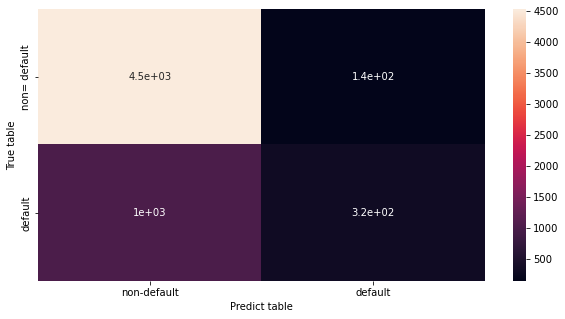

In [40]:
lr = LogisticRegression(C=2275, random_state=0, max_iter=1000)
lr.fit(xstdtrain, ystdtrain)
ypred = lr.predict(xstdtest)
print("Accuracy:", accuracy_score(ypred, ystdtest))
cv_score = cross_val_score(lr, stdX,y, cv=5)

print(classification_report(ypred,ystdtest))
print("average 5-fold cv score: {}".format(round(np.mean(cv_score)),4),
      ", Standard deviation: {}".format(round(np.std(cv_score),4)))

plt.figure(figsize=(10,5))
cm = confusion_matrix(ystdtest, ypred)
sns.heatmap(cm, annot=True, xticklabels=['non-default', 'default'], yticklabels=['non= default', 'default'])
plt.ylabel('True table')
plt.xlabel('Predict table')

In [41]:
# set up hyperparameter grid
param_grid = {'C' : np.logspace(-5,8,15)}

# intiatte a logistic regression classifier
logreg = LogisticRegression(max_iter=800)

# intiate randomized search cv object
logreg_cv = RandomizedSearchCV(logreg,param_grid, cv=5, random_state=0)

# fitiing the data
logreg_cv.fit(ximptrain, yimptrain)

print("Tuned logistic regression parameter best C(regularization) value: {}".format(logreg_cv.best_params_))

Tuned logistic regression parameter best C(regularization) value: {'C': 3.727593720314938}


Accuracy: 0.8111666666666667
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      5500
           1       0.26      0.68      0.38       500

    accuracy                           0.81      6000
   macro avg       0.61      0.75      0.63      6000
weighted avg       0.91      0.81      0.85      6000

average 5-fold cv score: 1 , Standard deviation: 0.0065


Text(0.5, 24.0, 'Predict table')

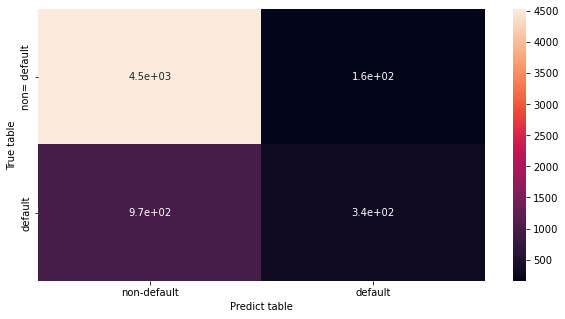

In [42]:
lr = LogisticRegression(C=3.73, random_state=0, max_iter=1000)
lr.fit(ximptrain, yimptrain)
ypred = lr.predict(ximptest)
print("Accuracy:", accuracy_score(ypred, yimptest))
cv_score = cross_val_score(lr, ximp,y, cv=5)

print(classification_report(ypred,yimptest))
print("average 5-fold cv score: {}".format(round(np.mean(cv_score)),4),
      ", Standard deviation: {}".format(round(np.std(cv_score),4)))

plt.figure(figsize=(10,5))
cm = confusion_matrix(yimptest, ypred)
sns.heatmap(cm, annot=True, xticklabels=['non-default', 'default'], yticklabels=['non= default', 'default'])
plt.ylabel('True table')
plt.xlabel('Predict table')

## Feature engineering

In [43]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

In [44]:
# creating a new feature
df['Risk_value'] = df['PAY_0']+df['PAY_2']+ df['PAY_3']+df['PAY_4']+ df['PAY_5']+ df['PAY_6']

C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


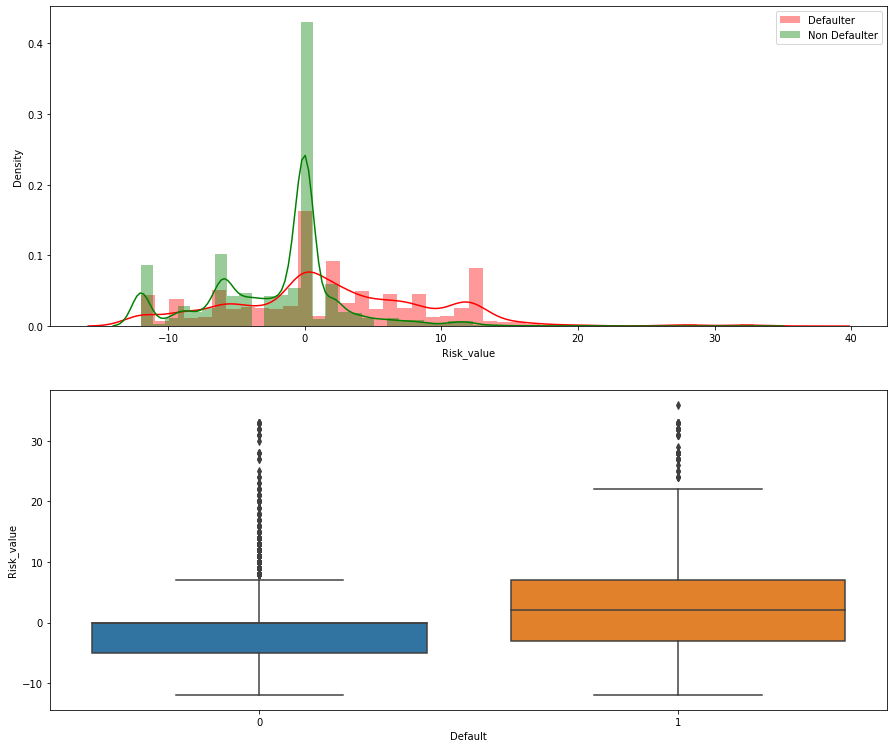

In [45]:
plt.figure(figsize=(15,20))

plt.subplot(3,1,1)
sns.distplot(df[df['Default']==1]['Risk_value'], color='red', label='Defaulter')
sns.distplot(df[df['Default']==0]['Risk_value'], color='green', label='Non Defaulter')
plt.legend()


plt.subplot(3,1,2)
sns.boxplot(x='Default', y='Risk_value', data=df)

In [46]:
# Feature no2
df['Bill_amt'] = (df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6'])

C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


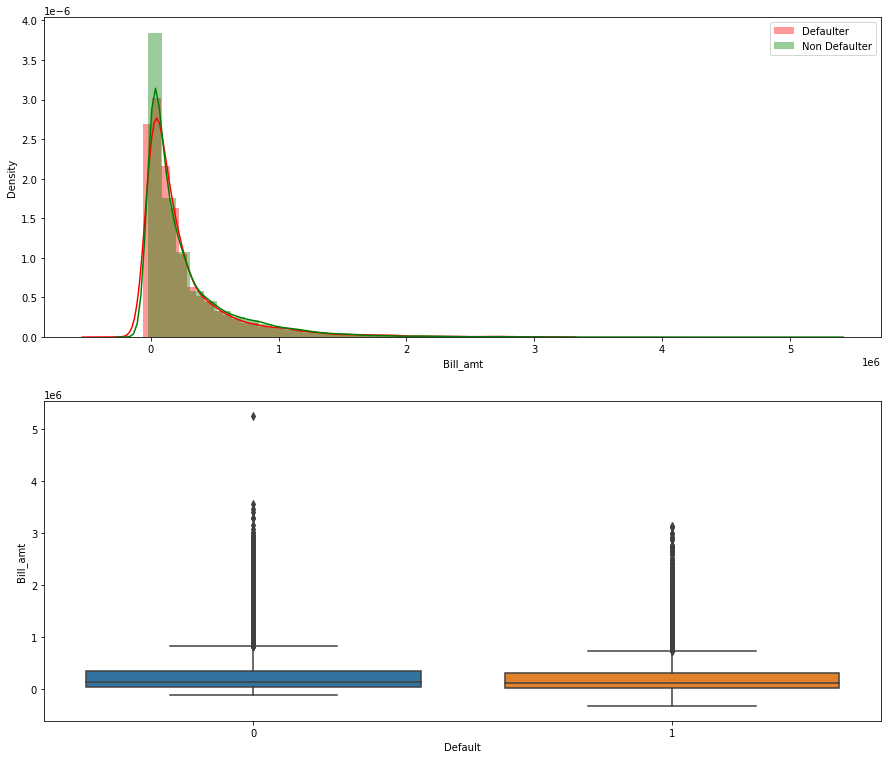

In [47]:
plt.figure(figsize=(15,20))

plt.subplot(3,1,1)
sns.distplot(df[df['Default']==1]['Bill_amt'], color='red', label='Defaulter')
sns.distplot(df[df['Default']==0]['Bill_amt'], color='green', label='Non Defaulter')
plt.legend()


plt.subplot(3,1,2)
sns.boxplot(x='Default', y='Bill_amt', data=df)

In [48]:
df[df['Bill_amt']<0]['Default'].value_counts()

0    150
1     51
Name: Default, dtype: int64

##### here people with negative bill amount more likely to default

#### not a good feature from boxplot you cannot differentiate defaulter and non-defaulter

In [49]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default',
       'Risk_value', 'Bill_amt'],
      dtype='object')

In [50]:
# featurer no 3
df['Bill_Pay'] = ((df['PAY_AMT1']-df["BILL_AMT1"])+
                 (df['PAY_AMT2']-df['BILL_AMT2'])+
                 (df['PAY_AMT3']-df['BILL_AMT3'])+
                 (df['PAY_AMT4']-df['BILL_AMT4'])+
                 (df['PAY_AMT5']-df['BILL_AMT5'])/5)

C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


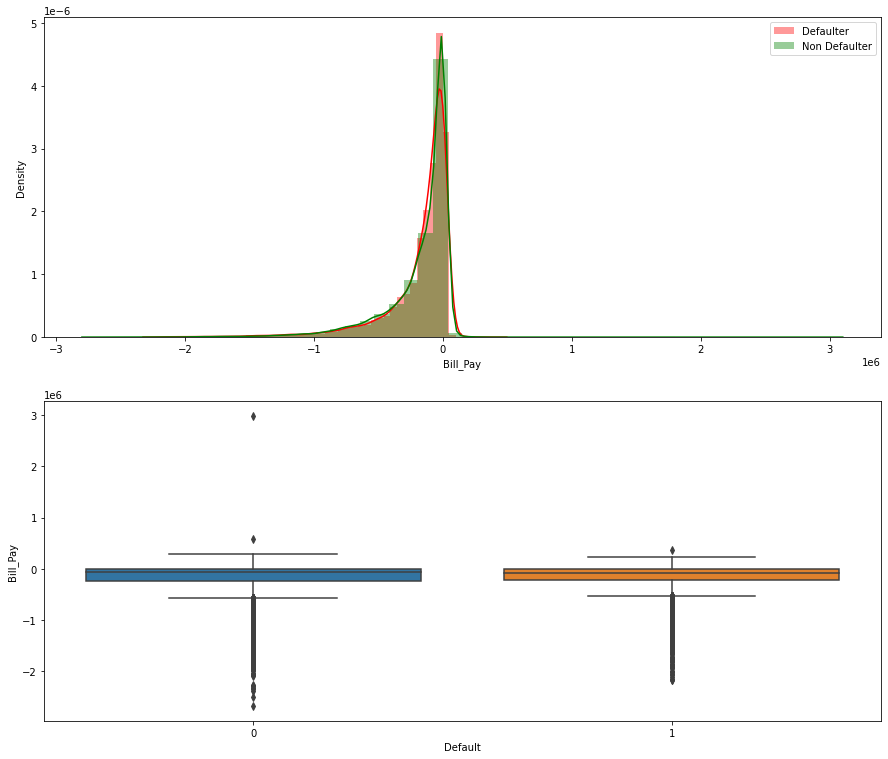

In [51]:
plt.figure(figsize=(15,20))

plt.subplot(3,1,1)
sns.distplot(df[df['Default']==1]['Bill_Pay'], color='red', label='Defaulter')
sns.distplot(df[df['Default']==0]['Bill_Pay'], color='green', label='Non Defaulter')
plt.legend()


plt.subplot(3,1,2)
sns.boxplot(x='Default', y='Bill_Pay', data=df)

In [52]:
df[df['Bill_Pay']>0]['Default'].value_counts()

0    3294
1     568
Name: Default, dtype: int64

#### people who pay more are less likely to default

In [53]:
# Adding the feature no3 to our model
ximp.head()

,PAY_0,BILL_AMT1,PAY_AMT2
0,1.794534,-0.642490,-0.227082
1,-0.874977,-0.659208,-0.213584
2,0.014860,-0.298555,-0.191884
3,0.014860,-0.057490,-0.169358
4,-0.874977,-0.578608,1.335012


In [54]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,Risk_value,Bill_amt,Bill_Pay
0,20000.0,1,2,1,24,2,2,-1,-1,-2,...,0.0,689.0,0.0,0.0,0.0,0.0,1,-2,7704.0,-7015.0
1,120000.0,1,2,2,26,-1,2,0,0,0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3,17077.0,-8052.0
2,90000.0,1,2,2,34,0,0,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,101653.0,-68927.6
3,50000.0,1,2,1,37,0,0,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,231334.0,-172087.0
4,50000.0,0,2,1,57,-1,0,-1,0,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,-2,109339.0,-17072.4


In [55]:
ximp['Bill_pay'] = (df.loc[:,'Bill_Pay']-df.loc[:,'Bill_Pay'].mean())/(df.loc[:,'Bill_Pay'].std())

C:\Users\HARDIK\AppData\Local\Temp/ipykernel_12600/3240802933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ximp['Bill_pay'] = (df.loc[:,'Bill_Pay']-df.loc[:,'Bill_Pay'].mean())/(df.loc[:,'Bill_Pay'].std())


In [56]:
ximp.head()

,PAY_0,BILL_AMT1,PAY_AMT2,Bill_pay
0,1.794534,-0.642490,-0.227082,0.627752
1,-0.874977,-0.659208,-0.213584,0.623903
2,0.014860,-0.298555,-0.191884,0.397953
3,0.014860,-0.057490,-0.169358,0.015060
4,-0.874977,-0.578608,1.335012,0.590422


In [57]:
xtr, xtt, ytr, ytt = train_test_split(ximp, y , test_size=0.2, random_state=42)

In [58]:
ximp.head()

,PAY_0,BILL_AMT1,PAY_AMT2,Bill_pay
0,1.794534,-0.642490,-0.227082,0.627752
1,-0.874977,-0.659208,-0.213584,0.623903
2,0.014860,-0.298555,-0.191884,0.397953
3,0.014860,-0.057490,-0.169358,0.015060
4,-0.874977,-0.578608,1.335012,0.590422


In [59]:
ximp.describe()

,PAY_0,BILL_AMT1,PAY_AMT2,Bill_pay
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,1.051994e-15,-4.653655e-16,-5.082694e-17,2.215466e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.764813e+00,-2.944263e+00,-2.569852e-01,-9.333364e+00
25%,-8.749766e-01,-6.473012e-01,-2.208321e-01,-1.983723e-01
50%,1.486028e-02,-3.916819e-01,-1.697923e-01,3.821648e-01
75%,1.486028e-02,2.154883e-01,-3.997954e-02,6.435271e-01
max,7.133555e+00,1.240276e+01,7.284177e+01,1.176316e+01


In [60]:
ximp = ximp.iloc[:30000,:]

In [61]:
# set up hyperparameter grid
param_grid = {'C' : np.logspace(-5,8,15)}

# intiatte a logistic regression classifier
logreg = LogisticRegression(max_iter=800)

# intiate randomized search cv object
logreg_cv = RandomizedSearchCV(logreg,param_grid, cv=5, random_state=0)

# fitiing the data
logreg_cv.fit(xtr, ytr)

print("Tuned logistic regression parameter best C(regularization) value: {}".format(logreg_cv.best_params_))

Tuned logistic regression parameter best C(regularization) value: {'C': 268.2695795279727}


Accuracy: 0.8106666666666666
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      5501
           1       0.26      0.68      0.37       499

    accuracy                           0.81      6000
   macro avg       0.61      0.75      0.63      6000
weighted avg       0.91      0.81      0.85      6000

average 5-fold cv score: 1 , Standard deviation: 0.0065


Text(0.5, 24.0, 'Predict table')

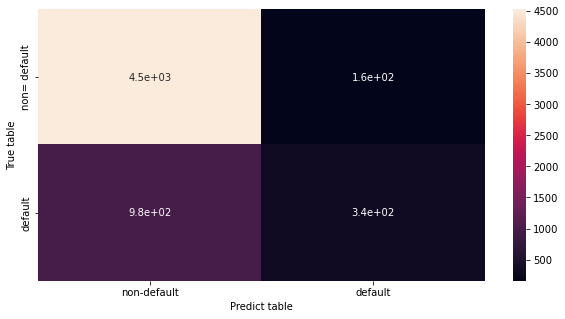

In [62]:
lr = LogisticRegression(C=269, random_state=0, max_iter=1000)
lr.fit(xtr, ytr)
ypred = lr.predict(xtt)
print("Accuracy:", accuracy_score(ypred, ytt))
cv_score = cross_val_score(lr, ximp,y, cv=5)

print(classification_report(ypred,yimptest))
print("average 5-fold cv score: {}".format(round(np.mean(cv_score)),4),
      ", Standard deviation: {}".format(round(np.std(cv_score),4)))

plt.figure(figsize=(10,5))
cm = confusion_matrix(yimptest, ypred)
sns.heatmap(cm, annot=True, xticklabels=['non-default', 'default'], yticklabels=['non= default', 'default'])
plt.ylabel('True table')
plt.xlabel('Predict table')

### incorporated feature no 3 in model but doesn't made any diiference

## Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [68]:
n_estimators = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500]
max_depth = [5, 10, 15, 20, 25, 30, 35]
min_samples_split = [2, 5, 10, 15,30, 50]
min_samples_leaf = [1, 2, 5,7, 10]

In [69]:
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [72]:

# intiate randomized search cv object
rf_cv = RandomizedSearchCV(rf,random_grid, cv=5,scoring='f1', 
                               n_iter = 10,
                               
                               random_state=42, n_jobs = 1)

# fitiing the data
rf_cv.fit(xtr, ytr)

print("Tuned logistic regression parameter best ",rf_cv.best_params_ )

Tuned logistic regression parameter best  {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 35}


Accuracy: 0.8176666666666667
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      5327
           1       0.34      0.66      0.45       673

    accuracy                           0.82      6000
   macro avg       0.65      0.75      0.67      6000
weighted avg       0.88      0.82      0.84      6000

average 5-fold cv score: 1 , Standard deviation: 0.009


Text(0.5, 24.0, 'Predict table')

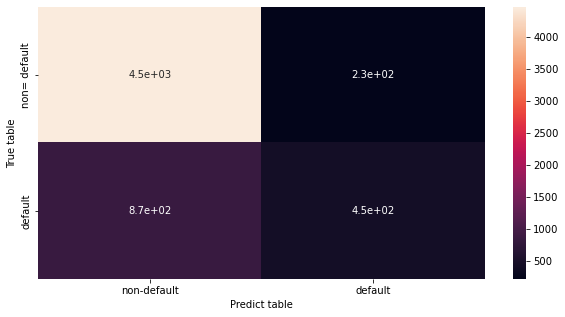

In [73]:
rf = RandomForestClassifier(n_estimators=300,
 min_samples_split= 10,
 min_samples_leaf= 10,
 max_features= 'sqrt',
 max_depth=35)
rf.fit(xtr, ytr)
ypred = rf.predict(xtt)
print("Accuracy:", accuracy_score(ypred, ytt))
cv_score = cross_val_score(rf, ximp,y, cv=5)

print(classification_report(ypred,yimptest))
print("average 5-fold cv score: {}".format(round(np.mean(cv_score)),4),
      ", Standard deviation: {}".format(round(np.std(cv_score),4)))

plt.figure(figsize=(10,5))
cm = confusion_matrix(yimptest, ypred)
sns.heatmap(cm, annot=True, xticklabels=['non-default', 'default'], yticklabels=['non= default', 'default'])
plt.ylabel('True table')
plt.xlabel('Predict table')